In [1]:
!pip install sklearn
!pip install --upgrade tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load data into different variables (from given file)
X_train = pd.read_csv("input_train.csv")
X_train = np.array(X_train.iloc[:,0:9])
Y_train = pd.read_csv("output_train.csv")
Y_train = np.array(Y_train)

X_test = pd.read_csv("input_test.csv")
X_test = np.array(X_test.iloc[:,0:9])
Y_test = pd.read_csv("output_test.csv")
Y_test = np.array(Y_test)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3226, 9) (3226, 3)
(846, 9) (846, 3)


In [43]:
# Prepare model with different variables using random forest (from given file)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(min_samples_split=5,random_state = 200)
regressor.fit(X_train, Y_train)
Predict = regressor.predict(X_train)
#tune by changing min_samples_split and random_state values until satisfied

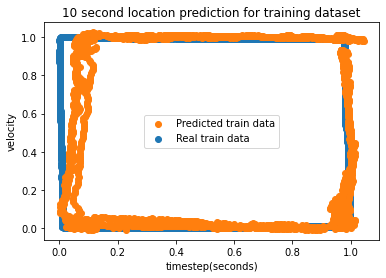

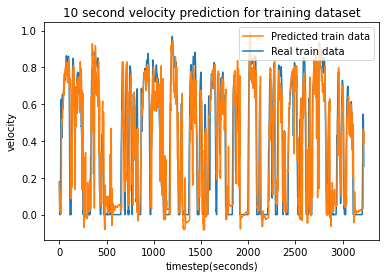

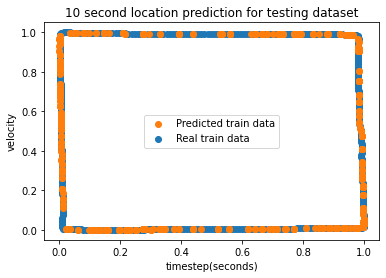

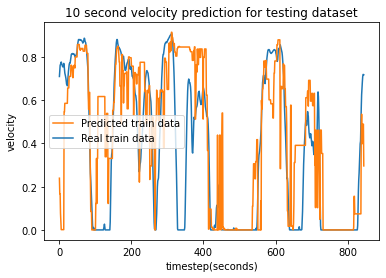

In [75]:
# Plot predictions with different variables using random forest (from given file)
plt.figure(3)
Test1 = plt.scatter(Y_train[:,1], Y_train[:,2])
Predict1 = plt.scatter(Predict[:,1], Predict[:,2])
plt.legend([Predict1,Test1], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(4)
Test2, =  plt.plot(Y_train[:,0])
Predict2, = plt.plot(Predict[:,0])
plt.legend([Predict2,Test2], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

Predict_test = regressor.predict(X_test)

plt.figure(5)
Test3 = plt.scatter(Y_test[:,1], Y_test[:,2])
Predict3 = plt.scatter(Predict_test[:,1], Predict_test[:,2])
plt.legend([Predict3,Test3], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(6)
Test4, =  plt.plot(Y_test[:,0])
Predict4, = plt.plot(Predict_test[:,0])
plt.legend([Predict4,Test4], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

In [45]:
# Plot predictions with different variables using random forest (from given file)
from sklearn.metrics import mean_squared_error
MSE1 = mean_squared_error(Y_test[:,0], Predict_test[:,0])
print(MSE1,'Mean Squared Error 10 second')

0.04609307637033544 Mean Squared Error 10 second


In [47]:
# Prepare model with different variables using decision trees (from given file)
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(min_samples_split=5,random_state = 200)
regressor.fit(X_train, Y_train)

Predict = regressor.predict(X_train)

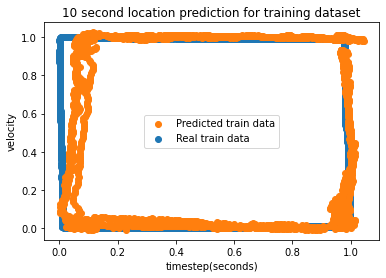

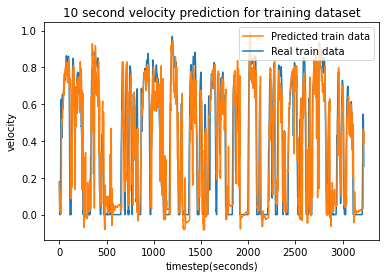

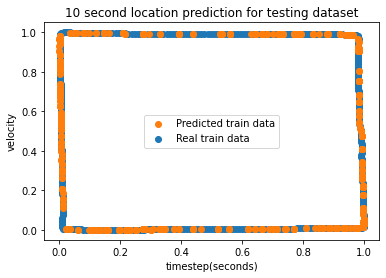

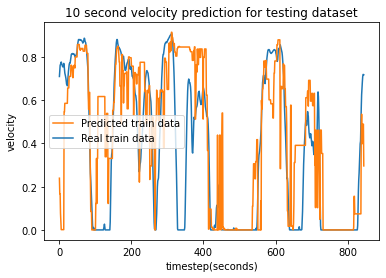

In [63]:
# Plot predictions with different variables using decision trees (from given file)
plt.figure(7)
Test1 = plt.scatter(Y_train[:,1], Y_train[:,2])
Predict1 = plt.scatter(Predict[:,1], Predict[:,2])
plt.legend([Predict1,Test1], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(8)
Test2, =  plt.plot(Y_train[:,0])
Predict2, = plt.plot(Predict[:,0])
plt.legend([Predict2,Test2], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

Predict_test = regressor.predict(X_test)

plt.figure(9)
Test3 = plt.scatter(Y_test[:,1], Y_test[:,2])
Predict3 = plt.scatter(Predict_test[:,1], Predict_test[:,2])
plt.legend([Predict3,Test3], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(10)
Test4, =  plt.plot(Y_test[:,0])
Predict4, = plt.plot(Predict_test[:,0])
plt.legend([Predict4,Test4], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

In [64]:
# Plot predictions with different variables using decision trees (from given file)
from sklearn.metrics import mean_squared_error
MSE1 = mean_squared_error(Y_test[:,0], Predict_test[:,0])
print(MSE1,'Mean Squared Error 10 second')

0.07220409250929936 Mean Squared Error 10 second


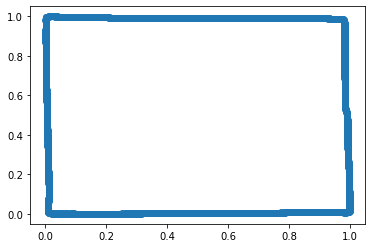

In [65]:
# 2D plot of MAP
plt.figure(1)
Map_Plot = plt.scatter(X_train[:,7], X_train[:,8])

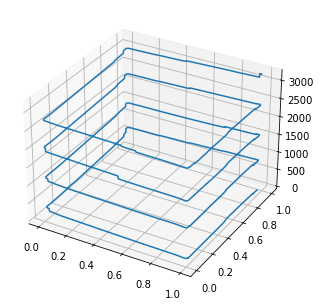

In [56]:
# 3D plot of MAP vs time
fig = plt.figure(2)
steps = list(range(0,3226))
ax = Axes3D(fig)
ax.plot3D(X_train[:,7], X_train[:,8], steps)

In [52]:
# for LSTM the input must be 3D
# Training
X_train_3D = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
print(X_train.shape)

(3226, 9)


In [60]:
# Prepare model with different variables using LSTM (from given file)
model = tf.keras.Sequential()
model.add(LSTM(64, activation= 'tanh' , input_shape = (1,9)))

model.add(Dense(3))
model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['mae','acc'])
model.fit( X_train_3D,Y_train,epochs = 200 ,batch_size = 50, verbose = 200)
Predict = model.predict(X_train_3D, verbose = 2)

Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

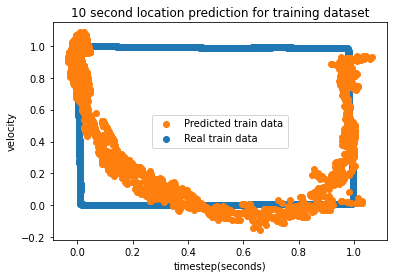

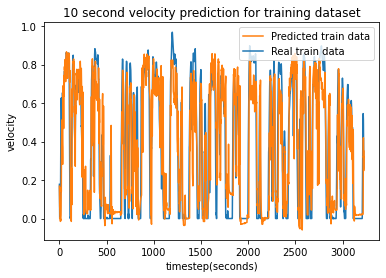

(846, 9)
27/27 - 0s


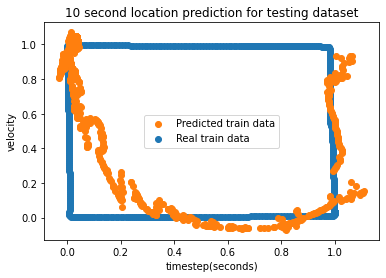

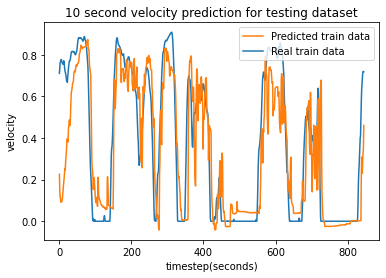

In [57]:
# Plot predictions with different variables using LSTM (from given file)
plt.figure(3)
Test1 = plt.scatter(Y_train[:,1], Y_train[:,2])
Predict1 = plt.scatter(Predict[:,1], Predict[:,2])
plt.legend([Predict1,Test1], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(4)
Test2,=  plt.plot(Y_train[:,0])
Predict2, = plt.plot(Predict[:,0])
plt.legend([Predict2,Test2], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for training dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

# Testing
X_test_3D = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
print(X_test.shape)
Predict_test = model.predict(X_test_3D, verbose = 2)

plt.figure(5)
Test3 = plt.scatter(Y_test[:,1], Y_test[:,2])
Predict3 = plt.scatter(Predict_test[:,1], Predict_test[:,2])
plt.legend([Predict3,Test3], ["Predicted train data", "Real train data"])
plt.title("10 second location prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

plt.figure(6)
Test4, =  plt.plot(Y_test[:,0])
Predict4, = plt.plot(Predict_test[:,0])
plt.legend([Predict4,Test4], ["Predicted train data", "Real train data"])
plt.title("10 second velocity prediction for testing dataset")
plt.xlabel("timestep(seconds)")
plt.ylabel("velocity")
plt.show()

In [58]:
# Plot predictions with different variables using LSTM (from given file)
MSE1 = mean_squared_error(Y_test[:,0], Predict_test[:,0])
print(MSE1,'Mean Squared Error 10 second')

0.03474270161283704 Mean Squared Error 10 second


In [62]:
import pandas
import numpy
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [74]:
fig = plt.figure(figsize=(20,20))
rows = 4
columns = 3

<Figure size 1440x1440 with 0 Axes>